In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

In [2]:
def main():
    adult = pd.read_csv('adult.data')
    adult_test = pd.read_csv('adult.test')
    
    X = adult.iloc[:,:-1]
    y = adult['income']
    
    test_X = adult_test.iloc[:,:-1]
    test_y = adult_test['income']
    
    #=======================================================================================================================================================
    #'''
    # 轉換時用全0代替，维度保持和正常的一致
    ohe = OneHotEncoder(handle_unknown='ignore')
    
    ohe.fit(X)
    
    X_train_ohe = ohe.transform(X).toarray()
    test_X_ohe = ohe.transform(test_X)
    
    ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(X.columns))

    ohe_df.head()
    
    #=======================================================================================================================================================
    
    clf = tree.DecisionTreeClassifier(random_state = 0, criterion='gini', splitter = 'best', max_depth = a, min_samples_leaf = b, min_samples_split = c)
    # 建立分類器
    adult_clf = clf.fit(X_train_ohe, y)       
    
    #=======================================================================================================================================================
    #'''
    fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=1000)
    # 輸出分類樹圖片
    tree.plot_tree(adult_clf,feature_names = ohe_df.columns, class_names=np.unique(y).astype('str'),filled = True)
    # 儲存分類器圖片, bbox_inches=”tight” : 可防止截斷圖像
    plt.savefig('adult_Ans_'+ a_str + '_' + b_str + '_' + c_str + '.png', format='png', bbox_inches = "tight")
    plt.show()
    #'''
    #=======================================================================================================================================================
    #'''
    # train data & test data
    test_y_pre = adult_clf.predict(X_train_ohe)
    test_y_predicted = adult_clf.predict(test_X_ohe)
    
    # train data & test data 與 train data 做比較
    accuracy1 = metrics.accuracy_score(y,test_y_pre)
    accuracy = metrics.accuracy_score(test_y, test_y_predicted)
    
    # 輸出比較值
    print(accuracy1)
    print(accuracy)
    print(classification_report(test_y, test_y_predicted))
    
    #=======================================================================================================================================================
    
    dict = {'test_y': test_y, 'train_test_y': test_y_predicted} 
    df = pd.DataFrame(dict)
    df.to_csv('adult_Ans_'+ a_str + '_' + b_str + '_' + c_str + ".csv", index = False)
    
    dict2 = {'train_acc': [accuracy1], 'test_acc': [accuracy]}
    df2 = pd.DataFrame(dict2)
    df2.to_csv('adult_Acc_'+ a_str + '_' + b_str + '_' + c_str + ".csv", index = False)

   age   workclass  fnlwgt   education  education-num  marital-status  \
0   39   State-gov   77516   Bachelors             13   Never-married   

      occupation    relationship    race    sex  capital-gain  capital-loss  \
0   Adm-clerical   Not-in-family   White   Male          2174             0   

   hours-per-week  native-country  income  
0              40   United-States   <=50K  
--------------------
   age workclass  fnlwgt education  education-num  marital-status  \
0   25   Private  226802      11th              7   Never-married   

           occupation relationship    race    sex  capital-gain  capital-loss  \
0   Machine-op-inspct    Own-child   Black   Male             0             0   

   hours-per-week  native-country  income  
0              40   United-States   <=50K  


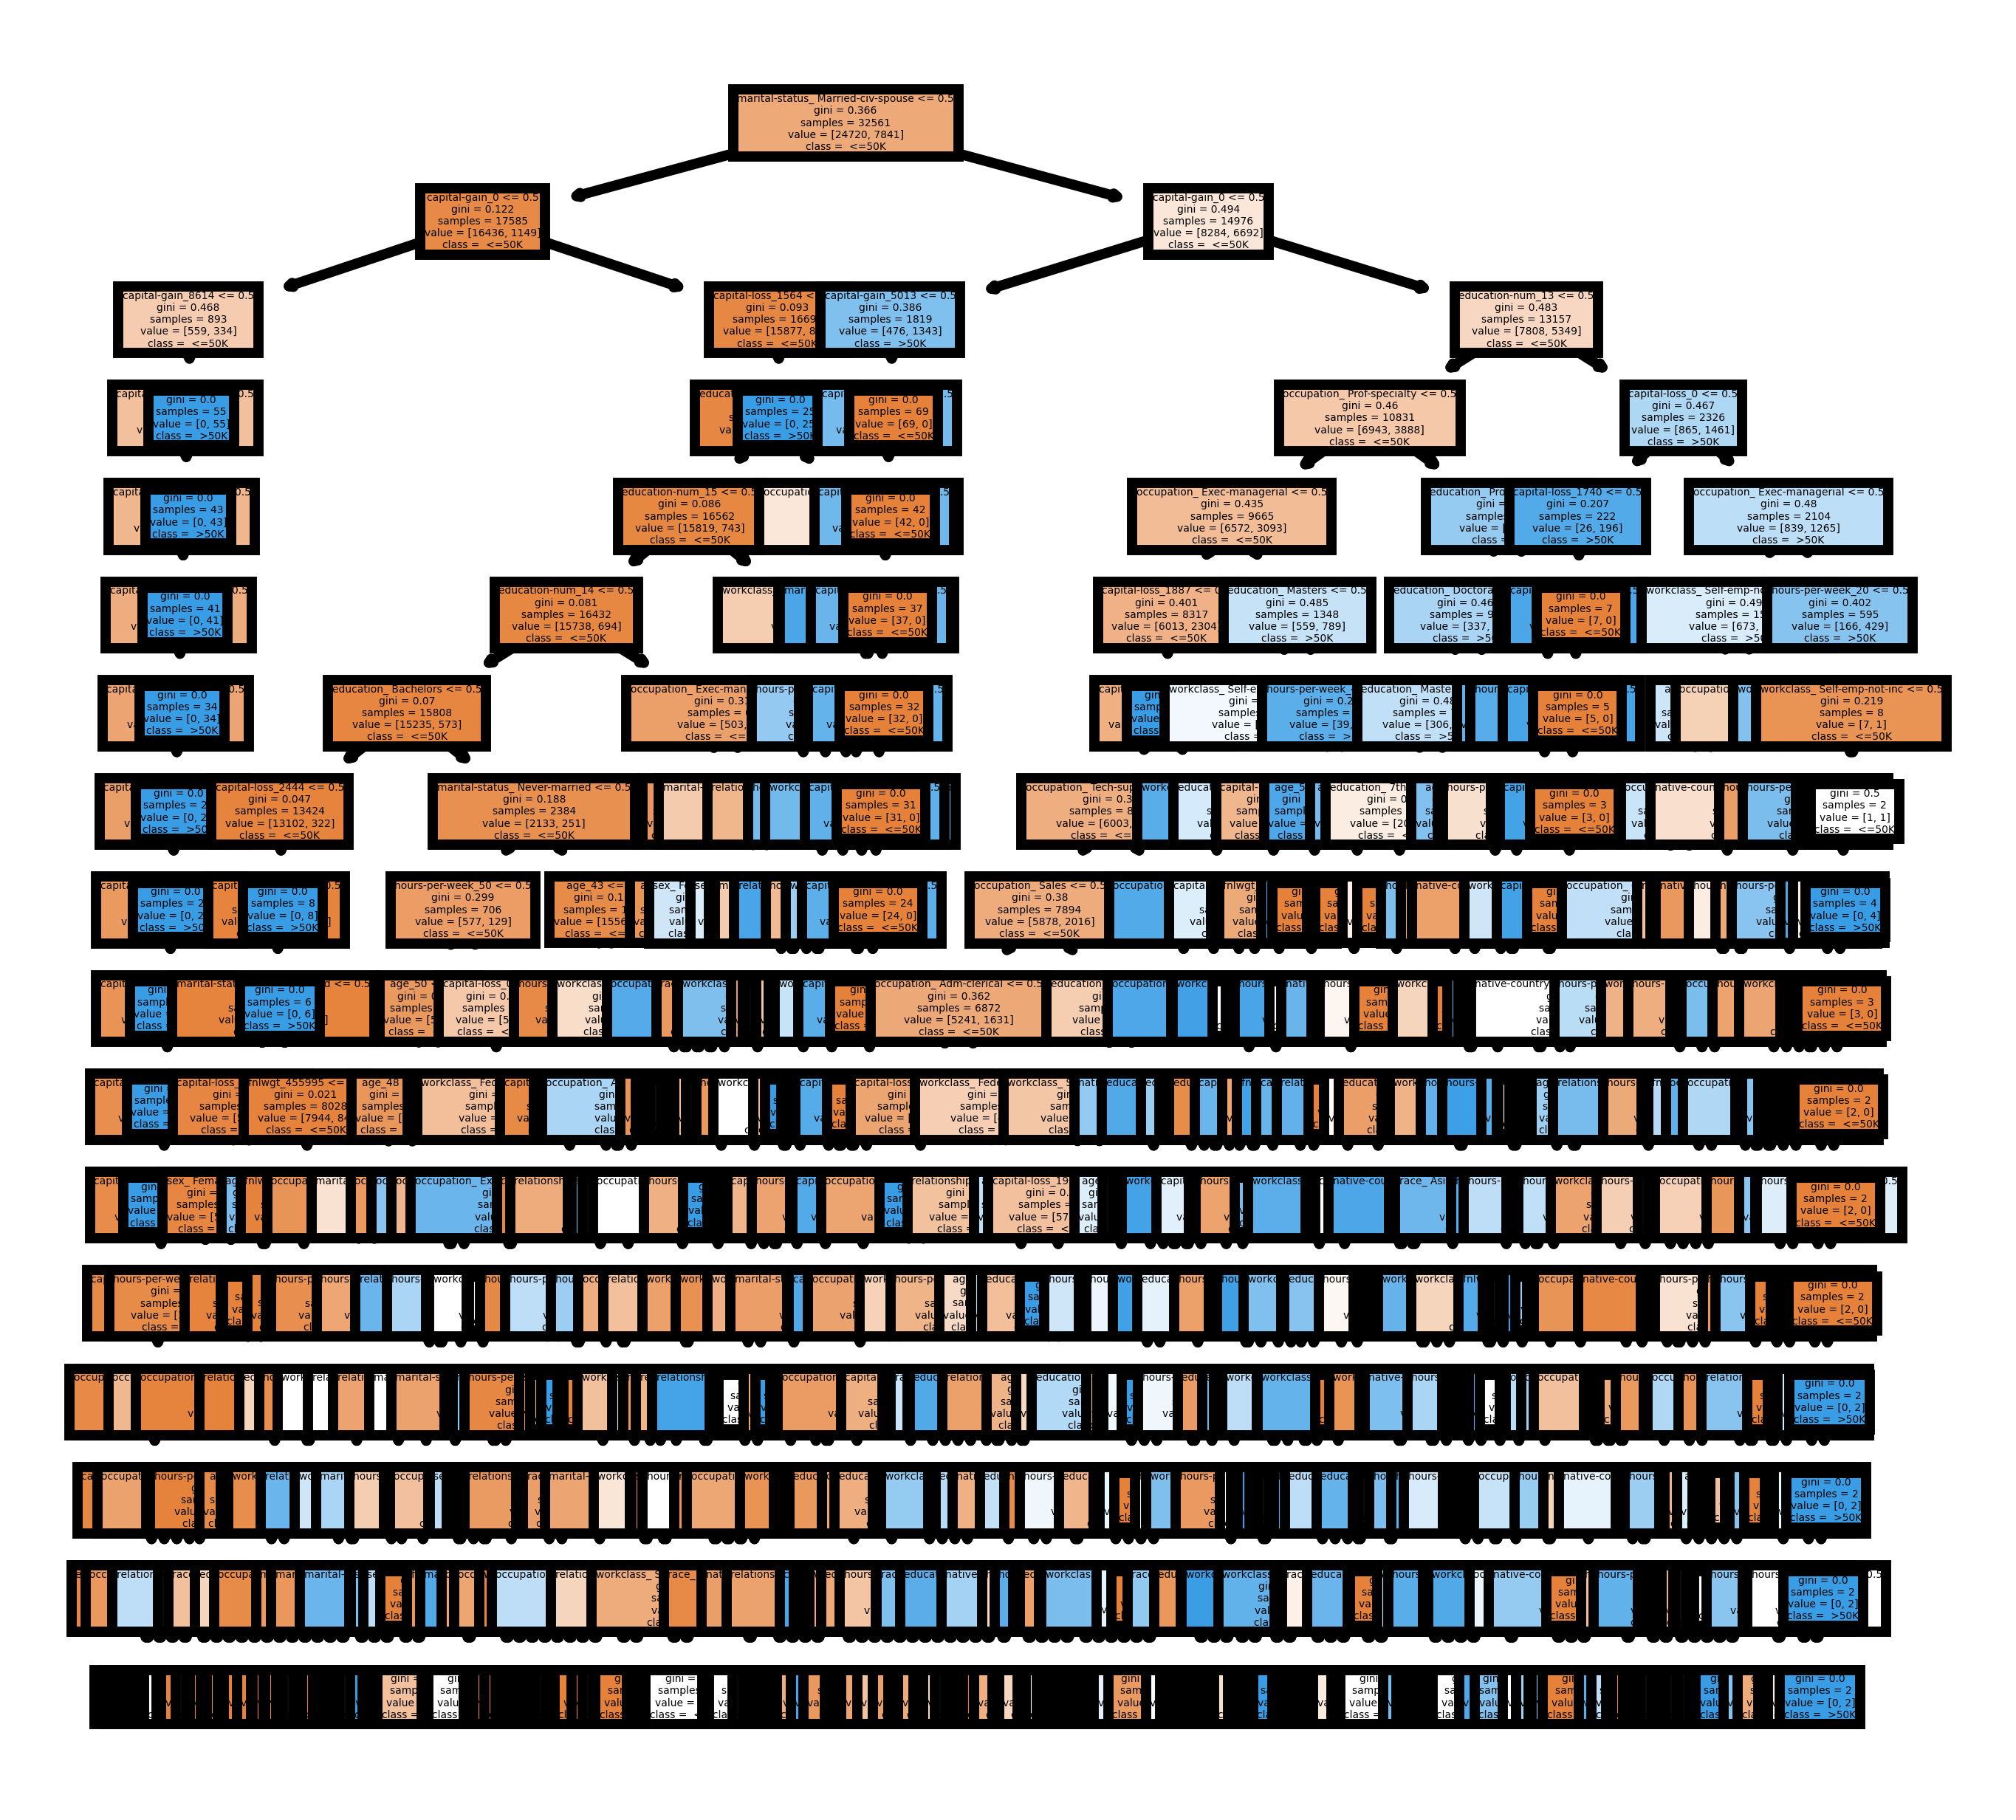

0.8784435367464144
0.8562127633437749
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91     12435
        >50K       0.74      0.61      0.67      3846

    accuracy                           0.86     16281
   macro avg       0.81      0.77      0.79     16281
weighted avg       0.85      0.86      0.85     16281



In [3]:
if __name__ == '__main__':
    with open('Ans.csv', 'w',encoding='utf-8') as csvfile:
    main()